In [1]:
from datetime import datetime, time as dt_time
import time as tm
from tabulate import tabulate
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from IPython.display import display

print("All modules are imported successfully.")

All modules are imported successfully.


In [2]:
def print_head(data, n=5):
    if isinstance(data, pd.DataFrame):
        display(data.head(n))
    elif isinstance(data, np.ndarray):
        display(pd.DataFrame(data[:n]))
    else:
        print("Непідтримуваний тип даних. Підтримуються лише DataFrame або NumPy масив.")

In [3]:
def create_numpy_arr(file_path):
    data = np.genfromtxt(file_path, delimiter=',', skip_header=1, missing_values='?', filling_values=np.nan)
    return data

In [4]:
def create_data_frame(file_path):
    dtype = {
        'Global_active_power': float,
        'Global_reactive_power': float,
        'Voltage': float,
        'Global_intensity': float,
        'Sub_metering_1': float,
        'Sub_metering_2': float,
        'Sub_metering_3': float
    }

    na_values = ['?']
    df = pd.read_csv(file_path, dtype=dtype, na_values=na_values)
    
    # Перетворення колонок 'Date' та 'Time' у відповідні типи даних
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
    df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S').dt.time
    df = df.dropna()
    
    # Візуалізація відсутніх даних
    msno.matrix(df)
    plt.show()

    return df

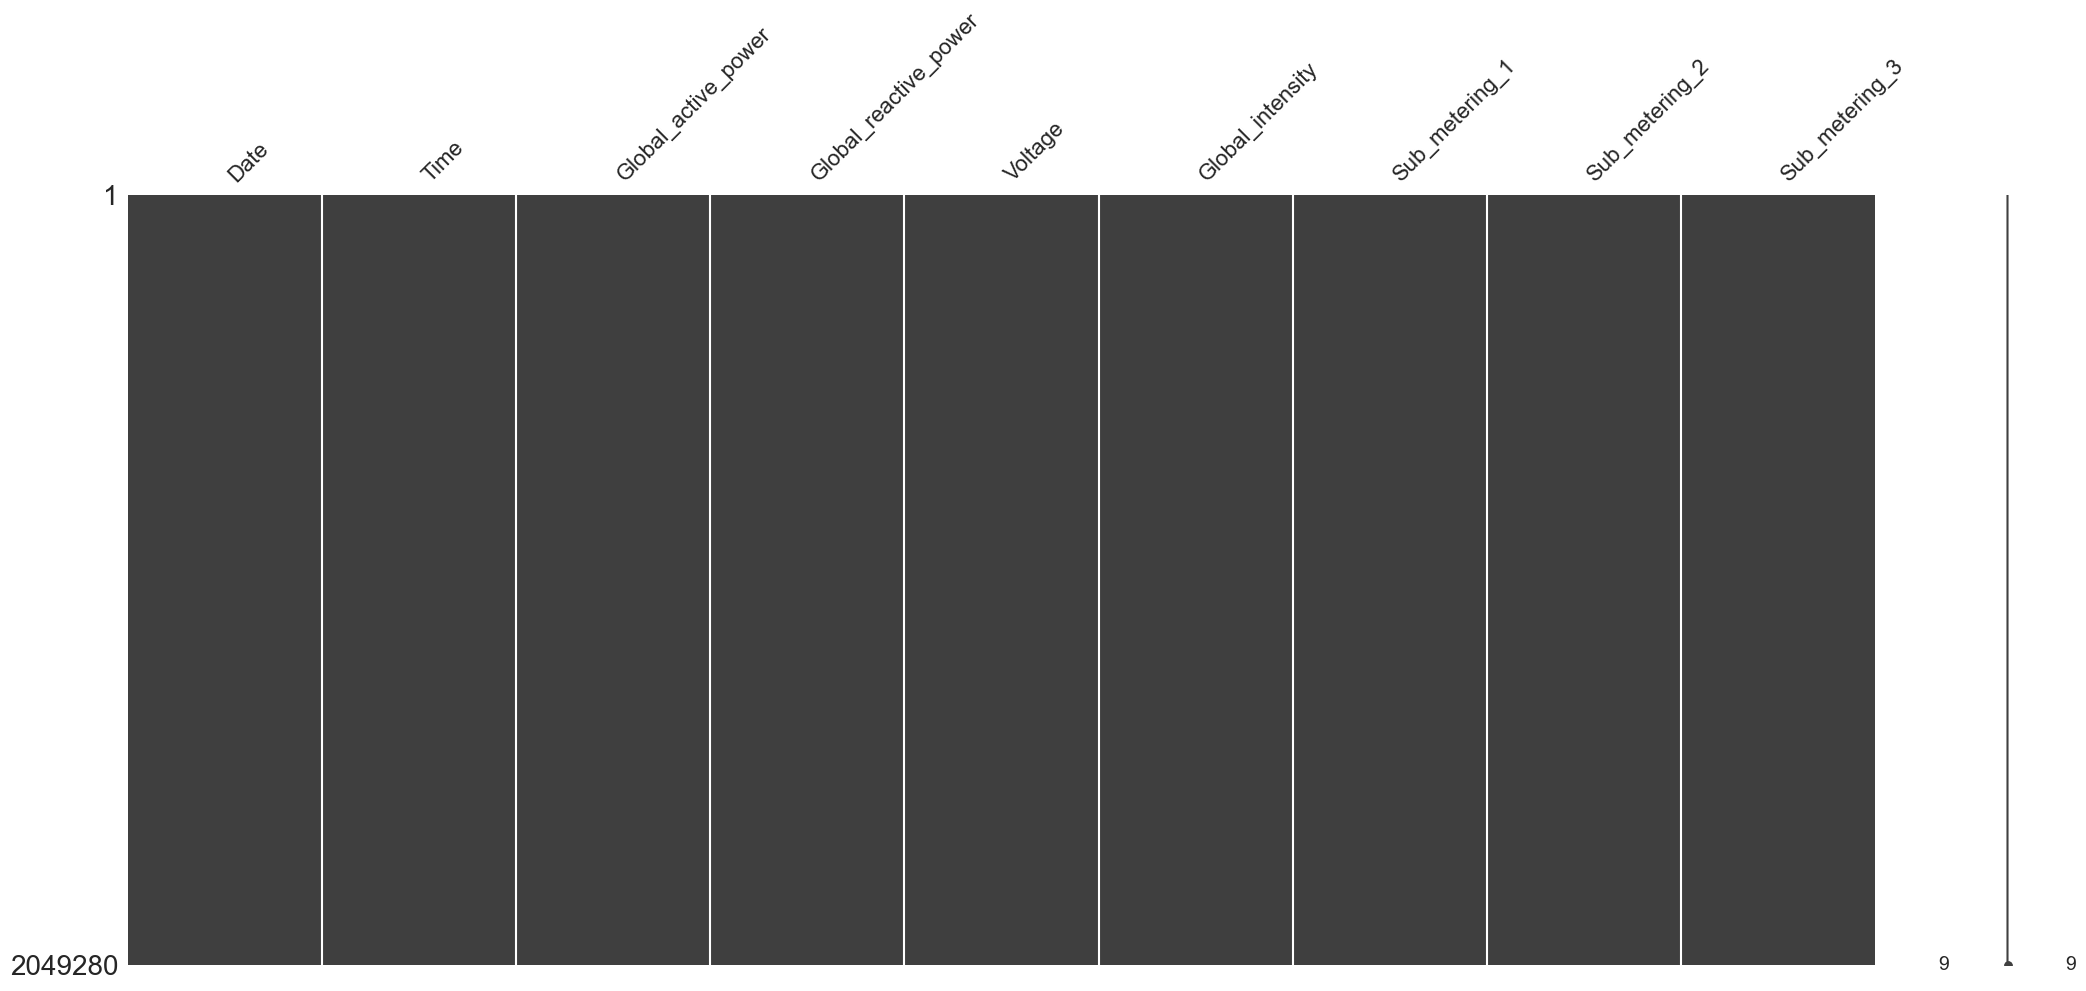

,0,1,2,3,4,5,6,7,8
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.36,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.52,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.52,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.7,0.52,235.22,15.8,0.0,1.0,17.0
8,2006-12-16,17:32:00,3.668,0.51,233.99,15.8,0.0,1.0,17.0
9,2006-12-16,17:33:00,3.662,0.51,233.86,15.8,0.0,2.0,16.0


In [5]:
file = "household_power_consumption.csv"
df = create_data_frame(file)
np_arr = df.to_numpy()

print_head(np_arr, 10)

In [6]:
df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
np_arr[:10]


array([[Timestamp('2006-12-16 00:00:00'), datetime.time(17, 24), 4.216,
        0.418, 234.84, 18.4, 0.0, 1.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 25), 5.36,
        0.436, 233.63, 23.0, 0.0, 1.0, 16.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 26), 5.374,
        0.498, 233.29, 23.0, 0.0, 2.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 27), 5.388,
        0.502, 233.74, 23.0, 0.0, 1.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 28), 3.666,
        0.528, 235.68, 15.8, 0.0, 1.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 29), 3.52,
        0.522, 235.02, 15.0, 0.0, 2.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 30), 3.702,
        0.52, 235.09, 15.8, 0.0, 1.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 31), 3.7,
        0.52, 235.22, 15.8, 0.0, 1.0, 17.0],
       [Timestamp('2006-12-16 00:00:00'), datetime.time(17, 32

In [8]:
def filter_by_power(df, threshold=5.0):
    return df[df['Global_active_power'] > threshold]

# Функція фільтрації NumPy масиву за активною потужністю
def filter_by_power_np(np_arr, threshold=5.0):
    return np_arr[np_arr[:, 2] > threshold]

In [9]:
print("\nЗадача 1")

# Фільтрація DataFrame
start_time = tm.time()
filtered_df = filter_by_power(df)
print_head(filtered_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")

# Фільтрація NumPy масиву
start_time_np = tm.time()
filtered_df_np = filter_by_power_np(np_arr)
print_head(filtered_df_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")



Задача 1


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
1,2006-12-16,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
11,2006-12-16,17:35:00,5.412,0.470,232.78,23.2,0.0,1.0,17.0
12,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0


Час виконання для DataFrame: 0.0541 секунд


,0,1,2,3,4,5,6,7,8
0,2006-12-16,17:25:00,5.36,0.436,233.63,23.0,0.0,1.0,16.0
1,2006-12-16,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2,2006-12-16,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
3,2006-12-16,17:35:00,5.412,0.47,232.78,23.2,0.0,1.0,17.0
4,2006-12-16,17:36:00,5.224,0.478,232.99,22.4,0.0,1.0,16.0


Час виконання для NumPy масиву: 0.0688 секунд


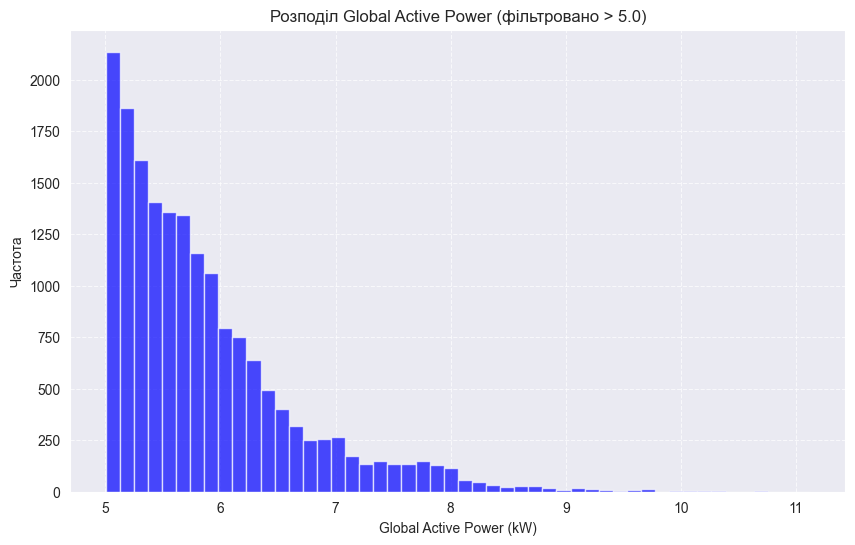

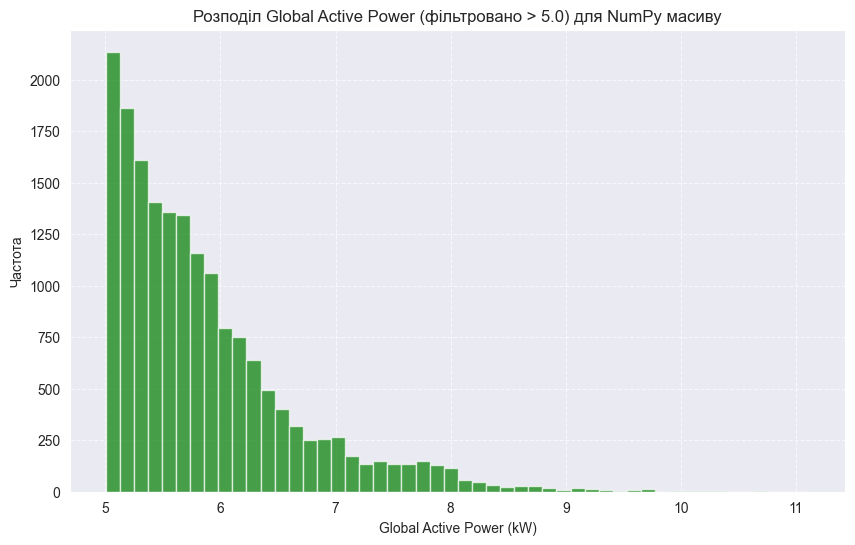

In [10]:
# Візуалізація результатів фільтрації для DataFrame
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Global_active_power'], bins=50, color='blue', alpha=0.7)
plt.title('Розподіл Global Active Power (фільтровано > 5.0)')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Візуалізація результатів фільтрації для NumPy масиву
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_np[:, 2], bins=50, color='green', alpha=0.7)
plt.title('Розподіл Global Active Power (фільтровано > 5.0) для NumPy масиву')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [11]:
def filter_by_voltage(df, threshold=235):
    return df[df['Voltage'] > threshold]

# Функція фільтрації NumPy масиву за вольтажем
def filter_by_voltage_np(np_arr, threshold=235):
    return np_arr[np_arr[:, 4] > threshold]

In [12]:
print("\nЗадача 2")

# Фільтрація DataFrame
start_time = tm.time()
filtered_df = filter_by_voltage(df)
print_head(filtered_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")

# Фільтрація NumPy масиву
start_time_np = tm.time()
filtered_df_np = filter_by_voltage_np(np_arr)
print_head(filtered_df_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")


Задача 2


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
4,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,2006-12-16,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,2006-12-16,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,2006-12-16,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
14,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0


Час виконання для DataFrame: 0.1976 секунд


,0,1,2,3,4,5,6,7,8
0,2006-12-16,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
1,2006-12-16,17:29:00,3.52,0.522,235.02,15.0,0.0,2.0,17.0
2,2006-12-16,17:30:00,3.702,0.52,235.09,15.8,0.0,1.0,17.0
3,2006-12-16,17:31:00,3.7,0.52,235.22,15.8,0.0,1.0,17.0
4,2006-12-16,17:38:00,4.054,0.422,235.24,17.6,0.0,1.0,17.0


Час виконання для NumPy масиву: 0.4710 секунд


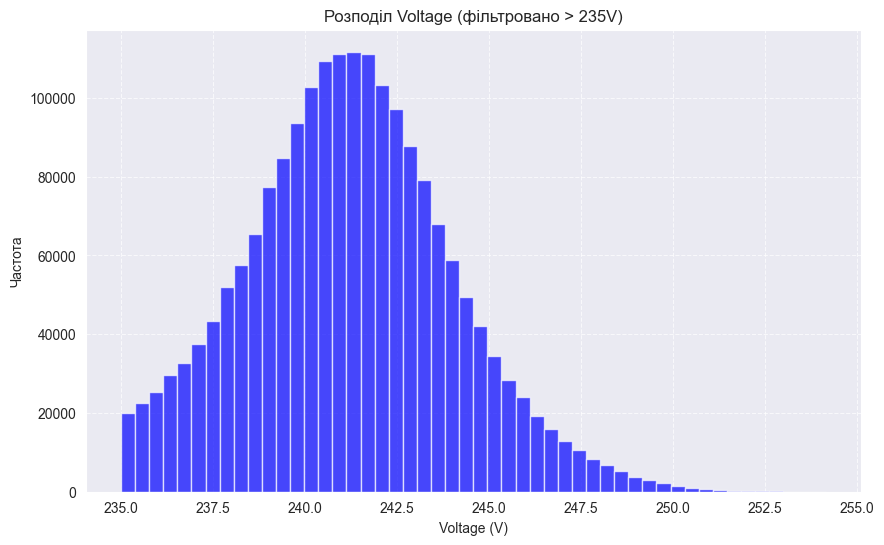

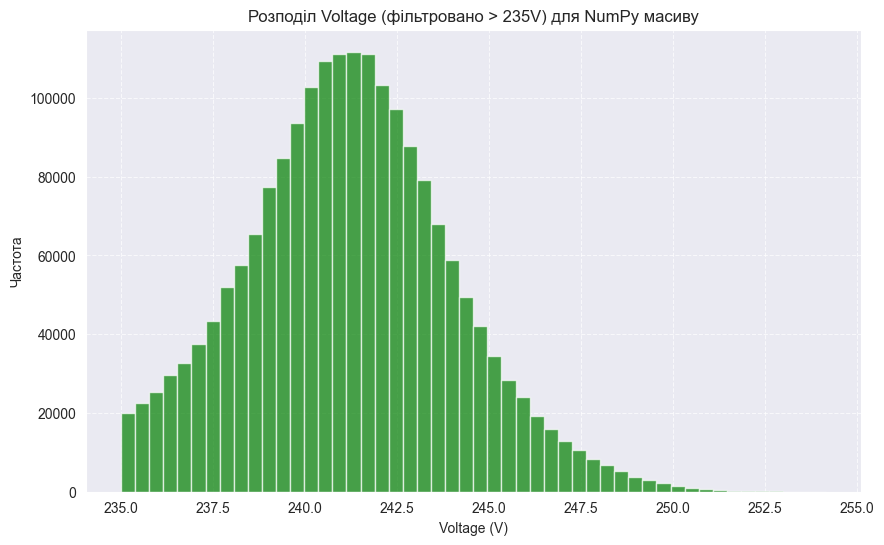

In [13]:
# Візуалізація результатів фільтрації для DataFrame
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Voltage'], bins=50, color='blue', alpha=0.7)
plt.title('Розподіл Voltage (фільтровано > 235V)')
plt.xlabel('Voltage (V)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Візуалізація результатів фільтрації для NumPy масиву
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_np[:, 4], bins=50, color='green', alpha=0.7)
plt.title('Розподіл Voltage (фільтровано > 235V) для NumPy масиву')
plt.xlabel('Voltage (V)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [14]:
def filter_by_current_and_consumption(df, current_range=(19, 20)):
    filtered_df = df[(df['Global_intensity'] >= current_range[0]) & (df['Global_intensity'] <= current_range[1])]
    filtered_df = filtered_df[(filtered_df['Sub_metering_2'] > filtered_df['Sub_metering_3']) &
                              (filtered_df['Sub_metering_2'] > filtered_df['Sub_metering_1'])]
    return filtered_df

# Функція фільтрації NumPy масиву за струмом та споживанням
def filter_by_current_and_consumption_np(np_arr, current_range=(19, 20)):
    filtered_arr = np_arr[(np_arr[:, 5] >= current_range[0]) & (np_arr[:, 5] <= current_range[1])]
    filtered_arr = filtered_arr[(filtered_arr[:, 7] > filtered_arr[:, 8]) &
                                (filtered_arr[:, 7] > filtered_arr[:, 6])]
    return filtered_arr

In [15]:
print("\nЗадача 3")

# Фільтрація DataFrame
start_time = tm.time()
filtered_df = filter_by_current_and_consumption(df)
print_head(filtered_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")

# Фільтрація NumPy масиву
start_time_np = tm.time()
filtered_df_np = filter_by_current_and_consumption_np(np_arr)
print_head(filtered_df_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")


Задача 3


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
45,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
460,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
464,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
475,2006-12-17,01:19:00,4.636,0.140,237.37,19.4,0.0,36.0,0.0
476,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0


Час виконання для DataFrame: 0.0725 секунд


,0,1,2,3,4,5,6,7,8
0,2006-12-16,18:09:00,4.464,0.136,234.66,19.0,0.0,37.0,16.0
1,2006-12-17,01:04:00,4.582,0.258,238.08,19.6,0.0,13.0,0.0
2,2006-12-17,01:08:00,4.618,0.104,239.61,19.6,0.0,27.0,0.0
3,2006-12-17,01:19:00,4.636,0.14,237.37,19.4,0.0,36.0,0.0
4,2006-12-17,01:20:00,4.634,0.152,237.17,19.4,0.0,35.0,0.0


Час виконання для NumPy масиву: 0.4026 секунд


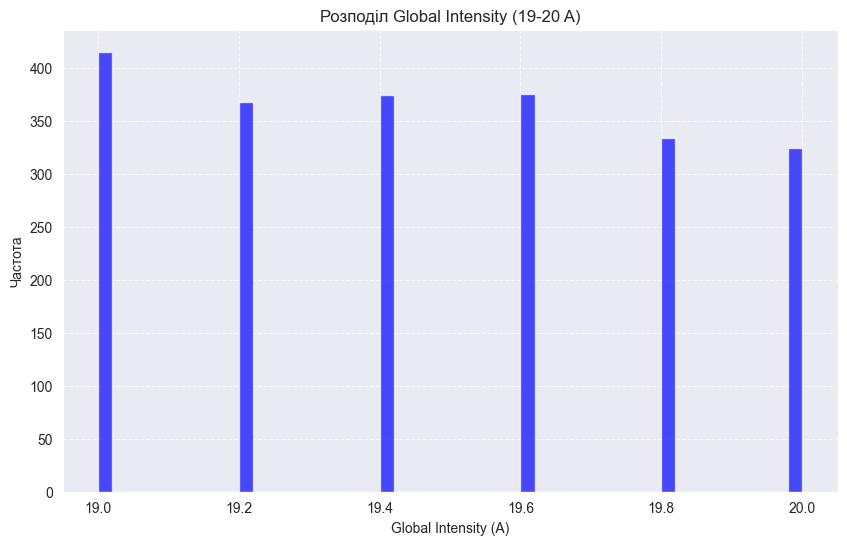

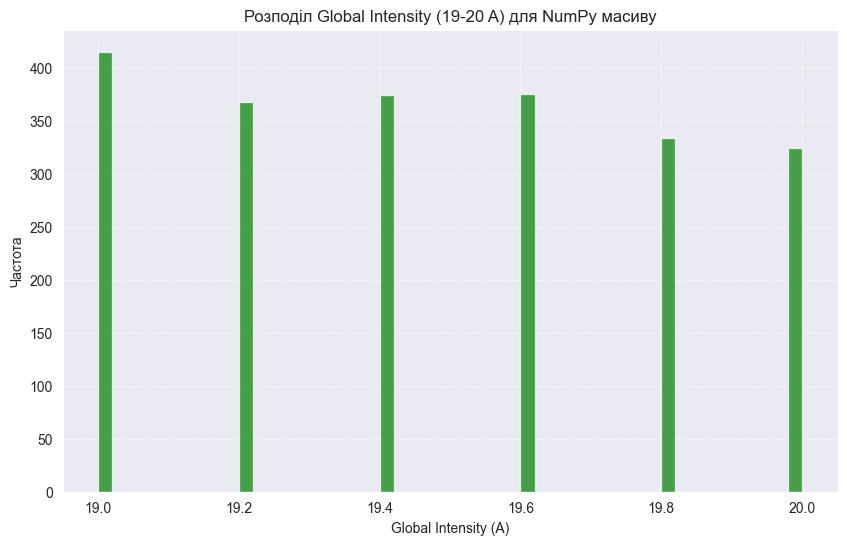

In [16]:
# Візуалізація результатів фільтрації для DataFrame
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Global_intensity'], bins=50, color='blue', alpha=0.7)
plt.title('Розподіл Global Intensity (19-20 A)')
plt.xlabel('Global Intensity (A)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Візуалізація результатів фільтрації для NumPy масиву
plt.figure(figsize=(10, 6))
plt.hist(filtered_df_np[:, 5], bins=50, color='green', alpha=0.7)
plt.title('Розподіл Global Intensity (19-20 A) для NumPy масиву')
plt.xlabel('Global Intensity (A)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [17]:
def random_sample_average(df, n=500000):
    sampled_indices = np.random.choice(df.index, n, replace=True)
    sampled_df = df.loc[sampled_indices]
    averages = sampled_df[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()
    return averages

# Функція для випадкової вибірки домогосподарств та обчислення середніх значень (NumPy масив)
def random_sample_average_np(np_arr, n=500000):
    sampled_np = np_arr[np.random.choice(np_arr.shape[0], n, replace=True), 6:9]
    averages = np.mean(sampled_np, axis=0)
    return averages

In [18]:
print("\nЗадача 4")

# Випадкова вибірка та обчислення середніх значень (DataFrame)
start_time = tm.time()
averages_df = random_sample_average(df, n=500000)
print("\nСередні значення для DataFrame:")
print(averages_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")

# Випадкова вибірка та обчислення середніх значень (NumPy масив)
start_time_np = tm.time()
averages_np = random_sample_average_np(np_arr, n=500000)
print("\nСередні значення для NumPy масиву:")
print(averages_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")


Задача 4

Середні значення для DataFrame:
Sub_metering_1    1.130504
Sub_metering_2    1.284878
Sub_metering_3    6.472100
dtype: float64
Час виконання для DataFrame: 0.4226 секунд

Середні значення для NumPy масиву:
[1.126808 1.307368 6.47366]
Час виконання для NumPy масиву: 0.4773 секунд


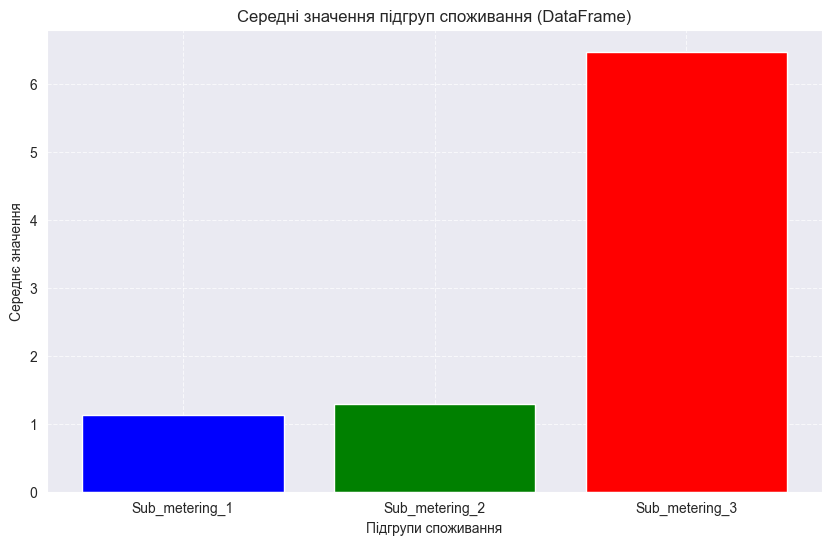

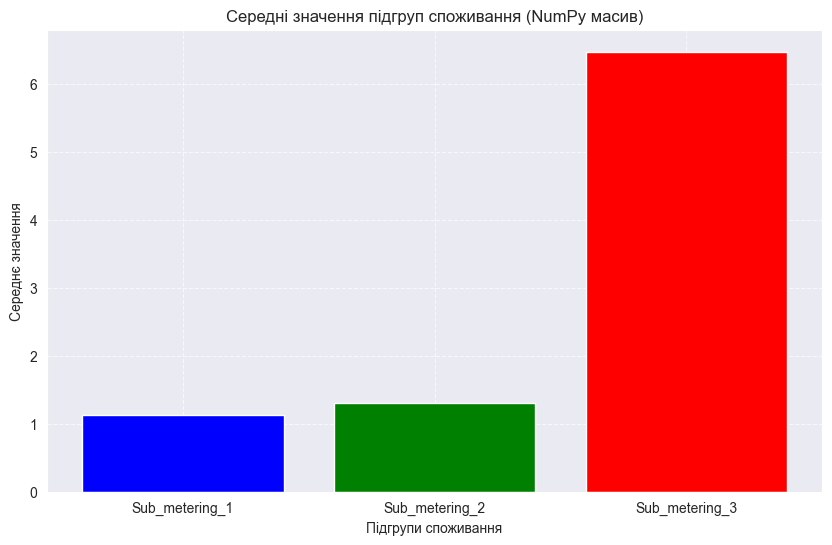

In [19]:
# Візуалізація результатів для DataFrame
labels = ['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
plt.figure(figsize=(10, 6))
plt.bar(labels, averages_df, color=['blue', 'green', 'red'])
plt.title('Середні значення підгруп споживання (DataFrame)')
plt.xlabel('Підгрупи споживання')
plt.ylabel('Середнє значення')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Візуалізація результатів для NumPy масиву
plt.figure(figsize=(10, 6))
plt.bar(labels, averages_np, color=['blue', 'green', 'red'])
plt.title('Середні значення підгруп споживання (NumPy масив)')
plt.xlabel('Підгрупи споживання')
plt.ylabel('Середнє значення')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [20]:
def complex_filter(df):
    filtered_df = df[(df['Time'] > dt_time(18, 0)) & 
                     (df['Global_active_power'] > 6) & 
                     (df['Sub_metering_2'] > df['Sub_metering_1']) & 
                     (df['Sub_metering_2'] > df['Sub_metering_3'])]

    fh = filtered_df.iloc[:len(filtered_df) // 2]
    sh = filtered_df.iloc[len(filtered_df) // 2:]
    result = pd.concat([fh.iloc[2::3], sh.iloc[3::4]])

    return result

# Функція складного фільтра для NumPy масиву
def complex_filter_np(np_arr):
    condition = (np_arr[:, 1].astype('O').astype(dt_time) >= dt_time(18, 0, 0)) & \
                (np_arr[:, 2] > 6) & \
                (np_arr[:, 7] > np_arr[:, 6]) & \
                (np_arr[:, 7] > np_arr[:, 8])
    
    filtered_array = np_arr[condition]

    fh = filtered_array[:len(filtered_array) // 2]
    sh = filtered_array[len(filtered_array) // 2:]
    result = np.concatenate([fh[2::3], sh[3::4]])
    return result


In [21]:
print("\nЗадача 5:")

# Фільтрація DataFrame
start_time = tm.time()
filtered_df = complex_filter(df)
print_head(filtered_df)
end_time = tm.time() - start_time
print(f"Час виконання для DataFrame: {end_time:.4f} секунд")

# Фільтрація NumPy масиву
start_time_np = tm.time()
filtered_np = complex_filter_np(np_arr)
print_head(filtered_np)
end_time_np = tm.time() - start_time_np
print(f"Час виконання для NumPy масиву: {end_time_np:.4f} секунд")


Задача 5:


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
43,2006-12-16,18:07:00,6.474,0.144,231.85,27.8,0.0,37.0,16.0
3007,2006-12-18,19:31:00,6.158,0.442,229.08,27.0,0.0,36.0,0.0
17497,2006-12-28,21:01:00,7.062,0.270,235.76,30.2,2.0,65.0,17.0
17500,2006-12-28,21:04:00,7.376,0.238,234.67,31.4,1.0,72.0,17.0
17503,2006-12-28,21:07:00,7.248,0.000,235.34,30.8,1.0,72.0,17.0


Час виконання для DataFrame: 0.1696 секунд


,0,1,2,3,4,5,6,7,8
0,2006-12-16,18:07:00,6.474,0.144,231.85,27.8,0.0,37.0,16.0
1,2006-12-18,19:31:00,6.158,0.442,229.08,27.0,0.0,36.0,0.0
2,2006-12-28,21:01:00,7.062,0.27,235.76,30.2,2.0,65.0,17.0
3,2006-12-28,21:04:00,7.376,0.238,234.67,31.4,1.0,72.0,17.0
4,2006-12-28,21:07:00,7.248,0.0,235.34,30.8,1.0,72.0,17.0


Час виконання для NumPy масиву: 0.2526 секунд


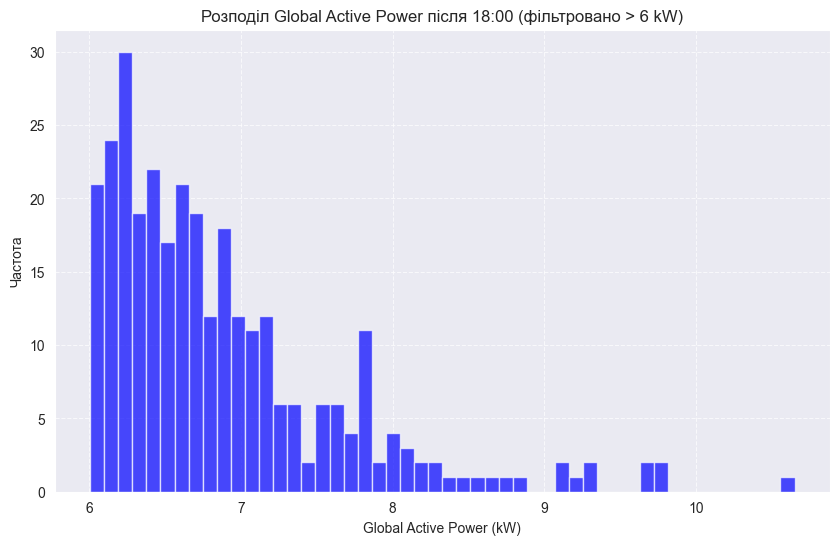

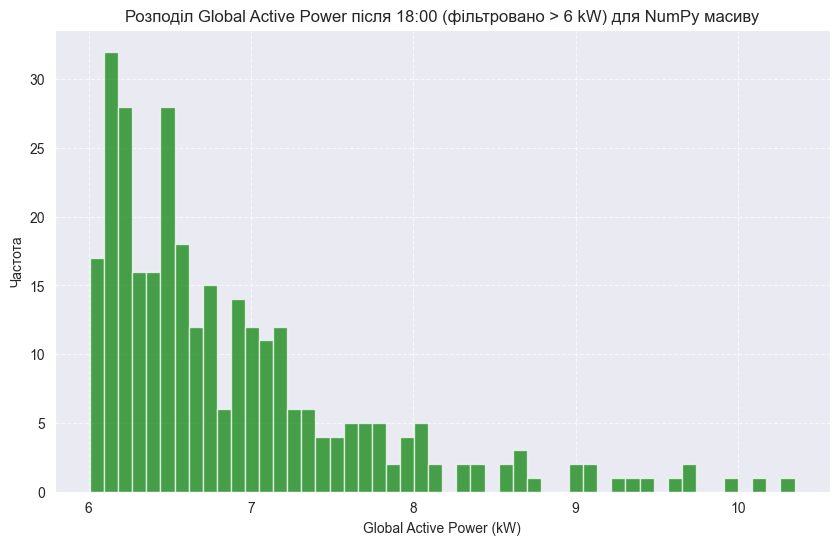

In [22]:
# Візуалізація результатів фільтрації для DataFrame
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Global_active_power'], bins=50, color='blue', alpha=0.7)
plt.title('Розподіл Global Active Power після 18:00 (фільтровано > 6 kW)')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Візуалізація результатів фільтрації для NumPy масиву
plt.figure(figsize=(10, 6))
plt.hist(filtered_np[:, 2], bins=50, color='green', alpha=0.7)
plt.title('Розподіл Global Active Power після 18:00 (фільтровано > 6 kW) для NumPy масиву')
plt.xlabel('Global Active Power (kW)')
plt.ylabel('Частота')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [23]:
# Функція для підсумку результатів
def summary_statistics(df, np_arr):
    print("\nЗагальні статистичні дані для DataFrame:")
    display(df.describe())
    
    print("\nЗагальні статистичні дані для NumPy масиву:")
    np_summary = pd.DataFrame(np_arr[:, 2:], columns=df.columns[2:])
    display(np_summary.describe())

# Функція для візуалізації часу виконання різних операцій
def execution_time_comparison(df_times, np_times, labels):
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(12, 6))
    bars1 = ax.bar(x - width/2, df_times, width, label='DataFrame', color='blue')
    bars2 = ax.bar(x + width/2, np_times, width, label='NumPy', color='green')

    ax.set_xlabel('Операції')
    ax.set_ylabel('Час виконання (секунди)')
    ax.set_title('Порівняння часу виконання для DataFrame та NumPy масиву')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for bar in bars1 + bars2:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Визначити часи виконання для кожної операції
# Задача 1
start_time = tm.time()
filtered_df_power = filter_by_power(df)
end_time_power = tm.time() - start_time

start_time_np = tm.time()
filtered_np_power = filter_by_power_np(np_arr)
end_time_power_np = tm.time() - start_time_np

# Задача 2
start_time = tm.time()
filtered_df_voltage = filter_by_voltage(df)
end_time_voltage = tm.time() - start_time

start_time_np = tm.time()
filtered_np_voltage = filter_by_voltage_np(np_arr)
end_time_voltage_np = tm.time() - start_time_np

# Задача 3
start_time = tm.time()
filtered_df_current = filter_by_current_and_consumption(df)
end_time_current = tm.time() - start_time

start_time_np = tm.time()
filtered_np_current = filter_by_current_and_consumption_np(np_arr)
end_time_current_np = tm.time() - start_time_np

# Задача 4
start_time = tm.time()
averages_df = random_sample_average(df, n=500000)
end_time_sample = tm.time() - start_time

start_time_np = tm.time()
averages_np = random_sample_average_np(np_arr, n=500000)
end_time_sample_np = tm.time() - start_time_np

# Задача 5
start_time = tm.time()
filtered_df_complex = complex_filter(df)
end_time_complex = tm.time() - start_time

start_time_np = tm.time()
filtered_np_complex = complex_filter_np(np_arr)
end_time_complex_np = tm.time() - start_time_np


Зведені статистичні дані для DataFrame та NumPy масиву:

Загальні статистичні дані для DataFrame:


,Date,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-01 13:00:00.309181952,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 00:00:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-10 00:00:00,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-11-30 00:00:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-11-23 00:00:00,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 00:00:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00



Загальні статистичні дані для NumPy масиву:


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2049280.000,2049280.0,2049280.00,2049280.0,2049280.0,2049280.0,2049280.0
unique,4186.000,532.0,2837.00,221.0,88.0,81.0,32.0
top,0.218,0.0,241.18,1.0,0.0,0.0,0.0
freq,9565.000,481561.0,3559.00,172785.0,1880175.0,1436830.0,852092.0



Порівняння часу виконання різних операцій:


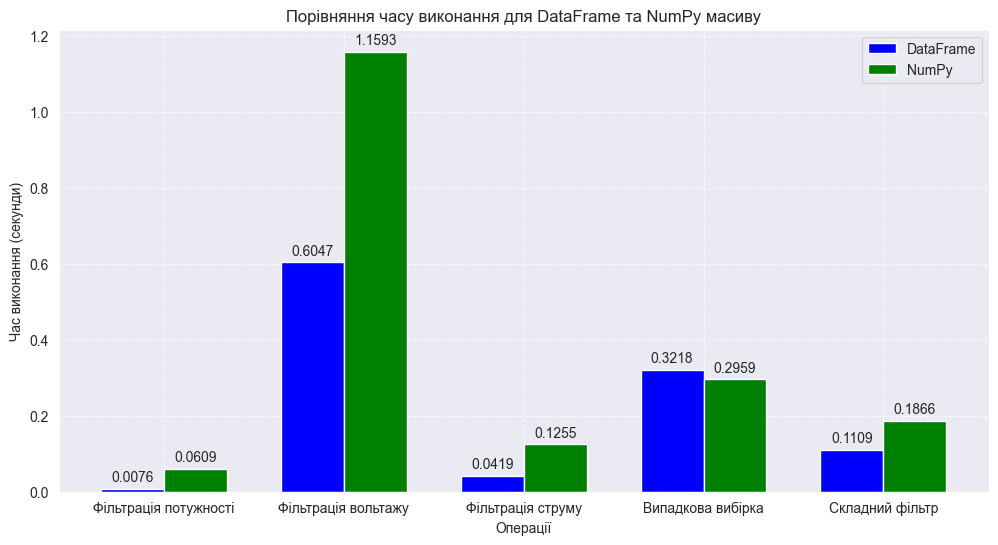

In [24]:
# Зібрати часи виконання для всіх операцій
df_times = [end_time_power, end_time_voltage, end_time_current, end_time_sample, end_time_complex]
np_times = [end_time_power_np, end_time_voltage_np, end_time_current_np, end_time_sample_np, end_time_complex_np]
labels = ['Фільтрація потужності', 'Фільтрація вольтажу', 'Фільтрація струму', 'Випадкова вибірка', 'Складний фільтр']

# Підсумок результатів та візуалізація
print("\nЗведені статистичні дані для DataFrame та NumPy масиву:")
summary_statistics(df, np_arr)

print("\nПорівняння часу виконання різних операцій:")
execution_time_comparison(df_times, np_times, labels)